# Decision Tree Example

#### Dataset used: heart_failure_clinical_records_dataset.csv
Download the dataset from `Location where it has been uploaded`


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

### 1. Read in the file and save the information in a dataframe

'.data' files can be read using pd.read_csv command. Also give the columns their relavent headings. 



In [51]:
data = pd.read_csv(r'datasets/heart_failure_clinical_records_dataset.csv')
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### 2. Choose the Target Attribute

Conventionally the class or target attribute is labeled as Y_data or just Y and the rest of the dataset is called X_data or X 

In [3]:
Y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis = 1)


### 3. Split the data



#### Finding out the data distribution of the target class `DEATH_EVENT`

This is useful to consider when we split the data into testing and training datasets. The predictions of a classifer can be skewed severly if it is trained on a non proportional dataset.

Text(0, 0.5, 'Number of records')

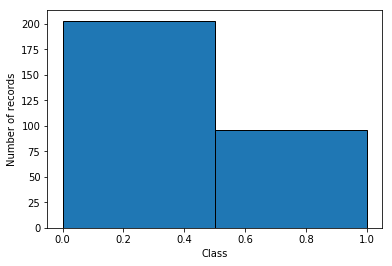

In [4]:
plt.hist(data["DEATH_EVENT"], bins = 2, edgecolor = "black")
plt.xlabel("Class")
plt.ylabel("Number of records")

####  We train the classifier on propotionally split data. We use 70% of data to train the model and 30% to test it. 

To split the data into testing and training sets we are going to use the `train_test_split()` function from `sklearn.model_selection`. 

The `stratify` parameter is used to proportionally split according to distribution of target class.

Documentaion: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y)  

## 4. Decision Tree Classifier 

For this example I am using the `Gini Impurity` method. 

#### Building the classifer

The Classifer is built using the `DecisionTreeClassifier()` method from `sklearn.tree`. The parameter `criterion` is used to specify the type of decision tree.  

In [6]:
clf = tree.DecisionTreeClassifier(criterion='gini')

#### Training the classifer

We will train the classifier on the traing data i.e. `X_train`, `Y_train`.

In [7]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

### 5. Model Accuracy 

#### Confusion Matrices

To build the confusion matrix we need to get the predictions of the trained model on the testing dataset i.e. `X_test`

In [8]:
Y_predictions = clf.predict(X_test)


The confusion matrix for our model is built using `confusion_matrix` from `sklearn.metrics`. 

In [9]:
cm = confusion_matrix(Y_predictions, Y_test)

#### To get the accuracy we need to get the sum of (true positives + true negatives) / total
This metric gives overall how often the classifer is correct. 

In [10]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [11]:
accuracy(cm)

0.7444444444444445

### 6. Tree Visualization 

The Tree is viusalized using `sklearn.tree.plot_tree()` This is plotted on a matplotlib figure and matplotlib commands can be used to style it. 

The overlap of nodes is a bug present in the plot_tree() function when plotting some kinds of trees. To view the hidden nodes try changing `figsize` to adapt the plot to your monitor resolution.   

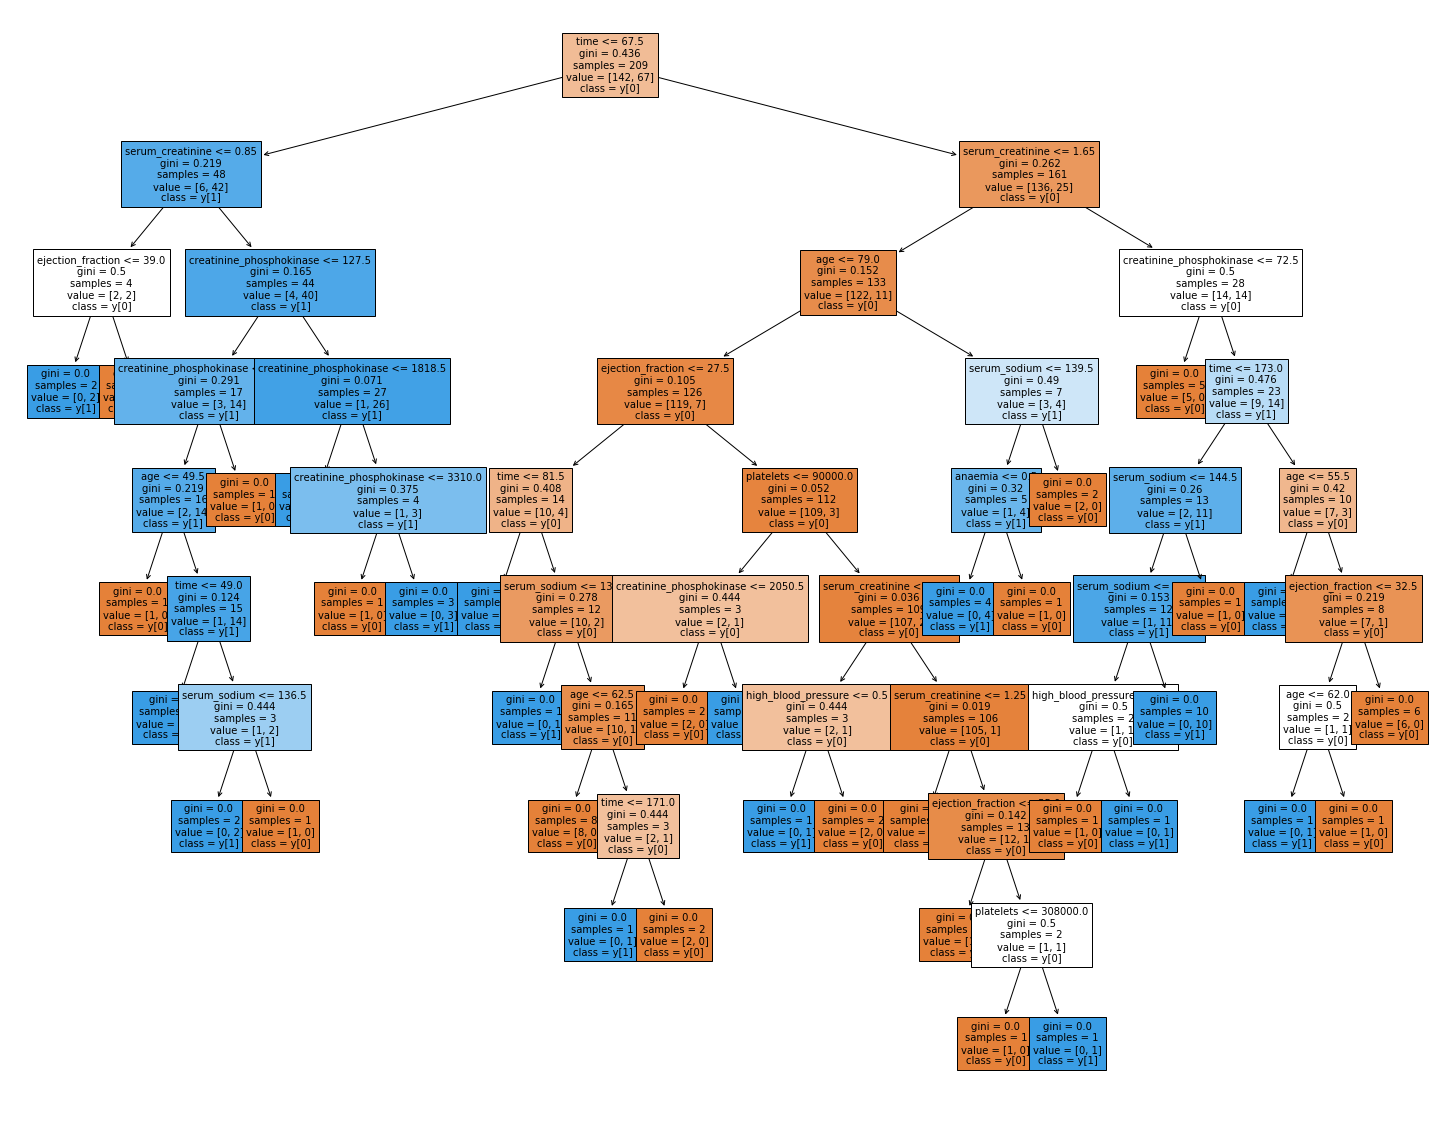

In [63]:
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True, fontsize=10, max_depth= None,feature_names = list(X.columns), class_names = True)
plt.show()